In [1]:
import numpy as np
import pandas as pd
import math
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import preprocessing


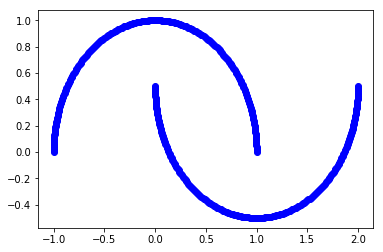

In [2]:
df = pd.read_csv("dataset1.txt",sep=" ",header=None, names = ["x", "y"])
%matplotlib inline
x = df['x']
y = df['y']
plt.plot(x,y,'bo')
plt.show()

In [4]:
Sum_of_squared_distances = []
K = [x for x in range(1,15)]
for k in range(len(K)):
    km = KMeans(n_clusters=K[k])
    km = km.fit(df)
    Sum_of_squared_distances.append(km.inertia_)

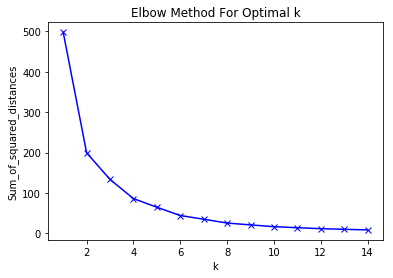

In [5]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

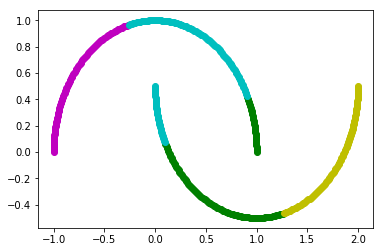

In [23]:
df_new = df
clusters = 4
model = KMeans(n_clusters = clusters)
model = model.fit(df_new)
pred = model.predict(df_new)
pred = pd.DataFrame(pred)

pred = pred.rename(columns={0:'pred'})

df_new = pd.concat([df_new,pred],axis=1)

mask1 = df_new['pred'].isin([0])
c1 = df_new[mask1]

mask2 = df_new['pred'].isin([1])
c2 = df_new[mask2]

mask3 = df_new['pred'].isin([2])
c3 = df_new[mask3]

mask4 = df_new['pred'].isin([3])
c4 = df_new[mask4]

plt.plot(c1['x'],c1['y'],'go')
plt.plot(c2['x'],c2['y'],'mo')
plt.plot(c3['x'],c3['y'],'yo')
plt.plot(c4['x'],c4['y'],'co')
plt.show()

In [6]:
Sum_of_squared_distances = []
K = [x for x in range(1,15)]
for k in range(len(K)):
    km = KMeans(n_clusters=K[k])
    km = km.fit(df)
    Sum_of_squared_distances.append(km.inertia_)

In [7]:
def DBSCAN(data,eps,minpts):
    labels = [0]*len(data)
    a = 0 ## ID of curent cluster
    
    for i in range(len(data)):
        if labels[i] != 0:
            continue
        neigh_pts = regionQuery(data,i,eps)
        if len(neigh_pts) < minpts:
            labels[i] = -1
        else:
            a += 1
            grow_clusters(data,labels,i,neigh_pts,a,eps,minpts)
    return labels

In [8]:
def regionQuery(data,i,eps):
    neighbors = []
    
    for j in range(len(data)):
        if(np.linalg.norm(data[i] - data[j]) < eps):
            neighbors.append(j)
    
    return neighbors

In [9]:
def grow_clusters(data,labels,i,neigh_pts,a,eps,minpts):
    labels[i] = a
    
    k = 0
    
    while(k<len(neigh_pts)):
        i = neigh_pts[k]
        if labels[i] == -1:
            labels[i] = a
        elif(labels[i] == 0) :
            labels[i] = a
            i_neigh_pts = regionQuery(data,i,eps)
            if(len(i_neigh_pts) >= minpts):
                neigh_pts += i_neigh_pts
        k += 1

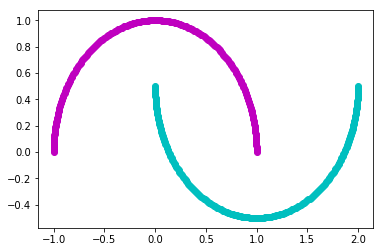

In [21]:
data = df.values
cluster = DBSCAN(data,0.05,5)
cluster = pd.DataFrame(cluster)
cluster = cluster.rename(columns={0:'cluster'})

data_new = pd.concat([df,cluster],axis=1)

mask1 = data_new['cluster'].isin([1])
cls1 = data_new[mask1]

mask2 = data_new['cluster'].isin([2])
cls2 = data_new[mask2]
plt.plot(cls1['x'],cls1['y'],'co')
plt.plot(cls2['x'],cls2['y'],'mo')
plt.show()

#### KMeans  shows 4 clusters which we could find the optimal number by Elbow Method. DBScan only showed 2 clusters

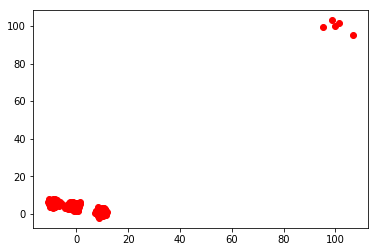

In [20]:
df1 = pd.read_csv("dataset2.txt",sep=" ",header=None, names = ["x", "y"])
x = df1['x']
y = df1['y']
plt.plot(x,y,'ro')
plt.show()

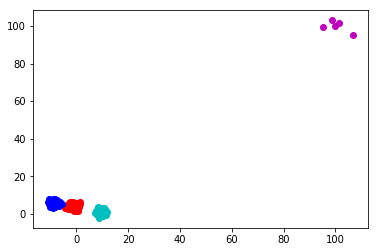

In [17]:
df_new = df1
clusters = 4
model = KMeans(n_clusters = clusters)
model = model.fit(df_new)
pred = model.predict(df_new)
pred = pd.DataFrame(pred)
# pred.columns = pred.columns.astype(str)
pred = pred.rename(columns={0:'pred'})

df_new = pd.concat([df_new,pred],axis=1)

mask1 = df_new['pred'].isin([0])
c1 = df_new[mask1]

mask2 = df_new['pred'].isin([1])
c2 = df_new[mask2]

mask3 = df_new['pred'].isin([2])
c3 = df_new[mask3]

mask4 = df_new['pred'].isin([3])
c4 = df_new[mask4]

plt.plot(c1['x'],c1['y'],'co')
plt.plot(c2['x'],c2['y'],'mo')
plt.plot(c3['x'],c3['y'],'ro')
plt.plot(c4['x'],c4['y'],'bo')
plt.show()

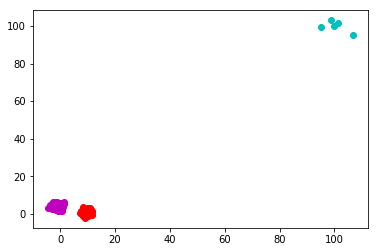

In [18]:
data = df1.values
cluster = DBSCAN(data,2,5)
cluster = pd.DataFrame(cluster)
cluster = cluster.rename(columns={0:'cluster'})
color = ['go','ro','mo','co']

data_new = pd.concat([df1,cluster],axis=1)
unique = data_new['cluster'].unique().tolist()

for i in range(len(unique)):
    if(unique[i] == -1):
        mask = data_new['cluster'].isin([-1])
        cls = data_new[mask]
        plt.plot(cls['x'],cls['y'],color[-1])
    else:
        mask = data_new['cluster'].isin([i])
        cls = data_new[mask]
        plt.plot(cls['x'],cls['y'],color[i])
    
plt.show()

### KMeans is much faster than DBScan  
### KMeans  needs number of clusters before clustering
### DBScan doesn’t need number of clusters
### DBScan needs a careful selection of its parameters
